In [1]:
#!/usr/bin/python

__author__ = 'hcaesar'

# A preview script that shows how to use the COCO API with stuff annotations.
#
# It lists the categories and super-categories and shows the
# annotations of an example image.
#
# Microsoft COCO Toolbox.      version 2.0
# Data, paper, and tutorials available at:  http://mscoco.org/
# Code written by Piotr Dollar and Tsung-Yi Lin, 2015.
# Licensed under the Simplified BSD License [see coco/license.txt]

from pycocotools.coco import COCO
import numpy as np
import skimage.io
import matplotlib.pyplot as plt

dataDir='..'
dataType='val2017'

'''
A preview script that shows how to use the COCO API.
:param dataDir: location of the COCO root folder
:param dataType: identifier of the ground-truth annotation file
:return: None
'''

# Define path
annFile = '%s/annotations/stuff_%s.json' % (dataDir, dataType)

# Initialize COCO ground truth API
cocoGt = COCO(annFile)

# Display COCO stuff categories and supercategories
categories = cocoGt.loadCats(cocoGt.getCatIds())
categoryNames = [cat['name'] for cat in categories]
print 'COCO Stuff leaf categories: \n', ' '.join(categoryNames)

superCategoryNames = sorted(set([cat['supercategory'] for cat in categories]))
print 'COCO Stuff super categories: \n', ' '.join(superCategoryNames)

loading annotations into memory...
Done (t=0.88s)
creating index...
index created!
COCO Stuff leaf categories: 
banner blanket branch bridge building-other bush cabinet cage cardboard carpet ceiling-other ceiling-tile cloth clothes clouds counter cupboard curtain desk-stuff dirt door-stuff fence floor-marble floor-other floor-stone floor-tile floor-wood flower fog food-other fruit furniture-other grass gravel ground-other hill house leaves light mat metal mirror-stuff moss mountain mud napkin net paper pavement pillow plant-other plastic platform playingfield railing railroad river road rock roof rug salad sand sea shelf sky-other skyscraper snow solid-other stairs stone straw structural-other table tent textile-other towel tree vegetable wall-brick wall-concrete wall-other wall-panel wall-stone wall-tile wall-wood water-other waterdrops window-blind window-other wood other
COCO Stuff super categories: 
building ceiling floor food-stuff furniture-stuff ground other plant raw-material s

Processing image 147498 

None
None
None
None


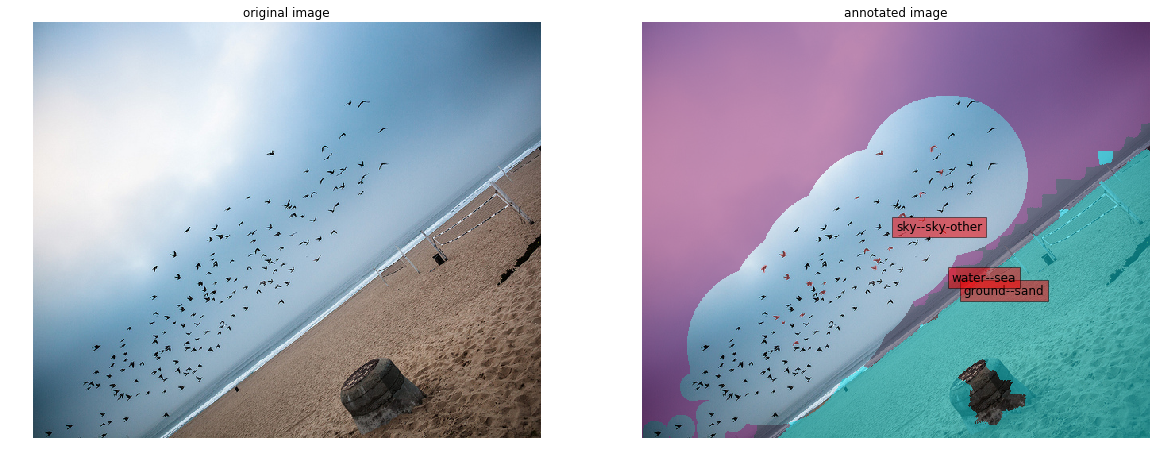

In [10]:
# Load info for a random image
imgIds = cocoGt.getImgIds()
imgId = imgIds[np.random.randint(0, len(imgIds))]
print 'Processing image', imgId, '\n' 
img = cocoGt.loadImgs(imgId)[0]

# Load and display image
I = skimage.io.imread(img['coco_url'])
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(I)
plt.axis('off')
plt.title('original image')

# Load and display stuff annotations
annIds = cocoGt.getAnnIds(imgIds=img['id'])
anns = cocoGt.loadAnns(annIds)
plt.subplot(122)
plt.imshow(I)

for ann in anns:
    color = cocoGt.showAnns([ann])
#     print(ann['category_id'])
    cat = categories[ann['category_id']-92]['name']
    cat_sup = categories[ann['category_id']-92]['supercategory']
    if cat_sup != 'other':
        bbox = ann['bbox']
        plt.text(bbox[0]+bbox[2]/2., bbox[1]+bbox[3]/2., '%s--%s'%(cat_sup, cat), 
             fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.axis('off')
plt.title('annotated image')
plt.show()

In [6]:
ann

{u'area': 45475.0,
 u'bbox': [41.0, 169.0, 599.0, 206.0],
 u'category_id': 183,
 u'id': 20003968,
 u'image_id': 71711,
 u'iscrowd': 0,
 u'segmentation': {u'counts': u'][a06U=1O2N0101N10aCOc;0[D7`;I^D:a;F]D=b;D\\D>S;_OjD42>R;DgDO6?R;1mD1R;OmD1k:]OmDc07Om:[100@mMjET2e:4MXNTET1h:nN[EQ1b:QO`Ek0_:XObEe0k9dN[Fj0I?l9hNZFl0KKY:YOlEo0K@]:BhEQ1KUOa:KcES1MjNd:4_EU1k:lNTEX1h:iNXE^1`:bN`Ej1U:VNkEn1P:SNoEo1o9RNQFo1m9RNRFP2l9QNTFQ2i9PNVFR2i9nMWFS2g9nMYFW2a9kM]F\\2\\9fMcF`2V9aMiFe2Q9]MnFc2Q9_MmFb2S9_MlFb2R9`MlFa2S9aMlF_2S9m0O1O100O1O1O2N1O1O100O1O1O1O1O2N100O1O1O1O1O101N1O1O1O100O1000001O000O100000000O101O00000O100000001N10001^HhJo6[5iHjJW7e5O10000000000O10001O000O10IfH]J[7b5hH[JY7d5iHZJX7e58O100O001O1O1O1O100O1O1O001O00100O1O0hNQHTMP8j2RHUMo7j2SHTMn7k2THSMm7?lGl08dNl7>PHl06cNl7>PHn07bNj7=RHP16aNi7<SHS15`Ni7:THV15]Nh7;VHW14\\Ng7:WHY14\\Nf78YH[13[Ne77ZH^12YNf75[Hb1NZNg72^Hc1K[Nh7N`Hf1H]Ni7JaHi1F\\Nk7HbHk1B^Nm7CdHo1_O^Nm7AfHP2]O`NZ9_1fF`N[9`1dFaN\\9_1dFaN]9]1cFdN]9\\1cFcN_9\\1`FbNc9^1]F_Nf9a1YF]Nk9a1VF\